### Decision Tree

Problem Statement:
    
Build A Decision Tree on the Following Dataset

Dataset-->pima-indians-diabetes_data.csv

Class Variable : 0-->No Diabetes, 1-->Yes Diabetes

In [1]:
#Importing the Required Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing

In [2]:
#Loading The Dataset
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
diabetes = pd.read_csv("C:/Users/Akaash/Downloads/pima-indians-diabetes_data.csv",names = names)
diabetes.head()

,preg,plas,pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Inferences: As the Y variable is already Numberical, So no need to use any Encoding Technique.

#### Feature Engineering -- Feature Importance using Decision Tree Classifier

In [3]:
#Separating the Input / Output variable
array = diabetes.values
X = array[:,0:8]
Y = array[:,8]

In [4]:
# feature extraction -- Using the DecisionTreeClassifier()
model = DecisionTreeClassifier()
model.fit(X, Y)
print(model.feature_importances_)

[0.06987818 0.31091269 0.09924838 0.01152637 0.039216   0.21524067
 0.14349195 0.11048576]


Inference: from the Decision Tree , Using DecisionTreeClassifier() method to get best feature, it gave that importances Score above by which we can determined 1,5,6,7 index columns are best features 

#### Separating X & Y Variables After Feature Selection

In [5]:
# seprating x and y(class) variables 
x= diabetes.loc[:,['plas', 'mass', 'pedi', 'age']]
y= diabetes['class']

In [6]:
x.head()

,plas,mass,pedi,age
0,148,33.6,0.627,50
1,85,26.6,0.351,31
2,183,23.3,0.672,32
3,89,28.1,0.167,21
4,137,43.1,2.288,33


In [7]:
y.head()

0    1
1    0
2    1
3    0
4    1
Name: class, dtype: int64

Inferences:These are X Variable selected after Feature Engineerinng Now the X & Y variables are splitted from the Dataset

In [8]:
# to check unique values in specified column
diabetes['class'].unique()

array([1, 0], dtype=int64)

In [9]:
# to count total values for distinct/unique value
diabetes['class'].value_counts()

0    500
1    268
Name: class, dtype: int64

Inference: This is a InBalanced Dataset.

When the Observation/Values are Equally Distributed along the all the Classes then it called Balanced Dataset.when They are not Equally Distributed then it is Called Inbalance Dataset 

In [10]:
# Splitting data into training and testing data set
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.2,random_state=40)

Inference: Made a Train-Test Split of 80% - 20%

In [11]:
x_train

,plas,mass,pedi,age
223,142,28.8,0.687,61
203,99,20.4,0.235,27
112,89,31.2,0.192,23
507,130,28.6,0.692,21
577,118,42.9,0.693,21
...,...,...,...,...
440,189,34.3,0.435,41
165,104,29.9,0.722,41
7,115,35.3,0.134,29
219,112,37.8,0.261,41


In [12]:
y_train

223    0
203    0
112    0
507    0
577    1
      ..
440    1
165    1
7      0
219    1
326    1
Name: class, Length: 614, dtype: int64

#### Building Decision Tree Classifier using Entropy Criteria -- C5.0

In [13]:
#applying DT classifier with criteria and depth on train models
model = DecisionTreeClassifier(criterion = 'entropy',max_depth=3)
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

Inference: Model is Fitted, The Decision Tree is of C5.0 Technique, Pruning is Set using the Hyperparameter of max_depth = 3, while means only Three Split/Node will be there.

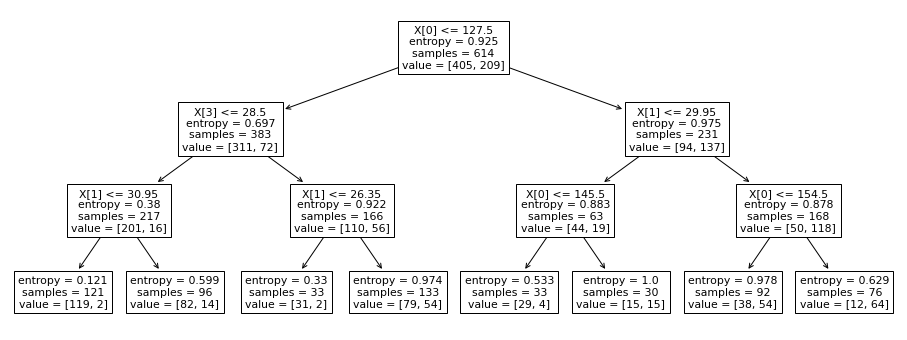

In [14]:
#PLot the decision tree
plt.figure(figsize=(16,6))
tree.plot_tree(model);

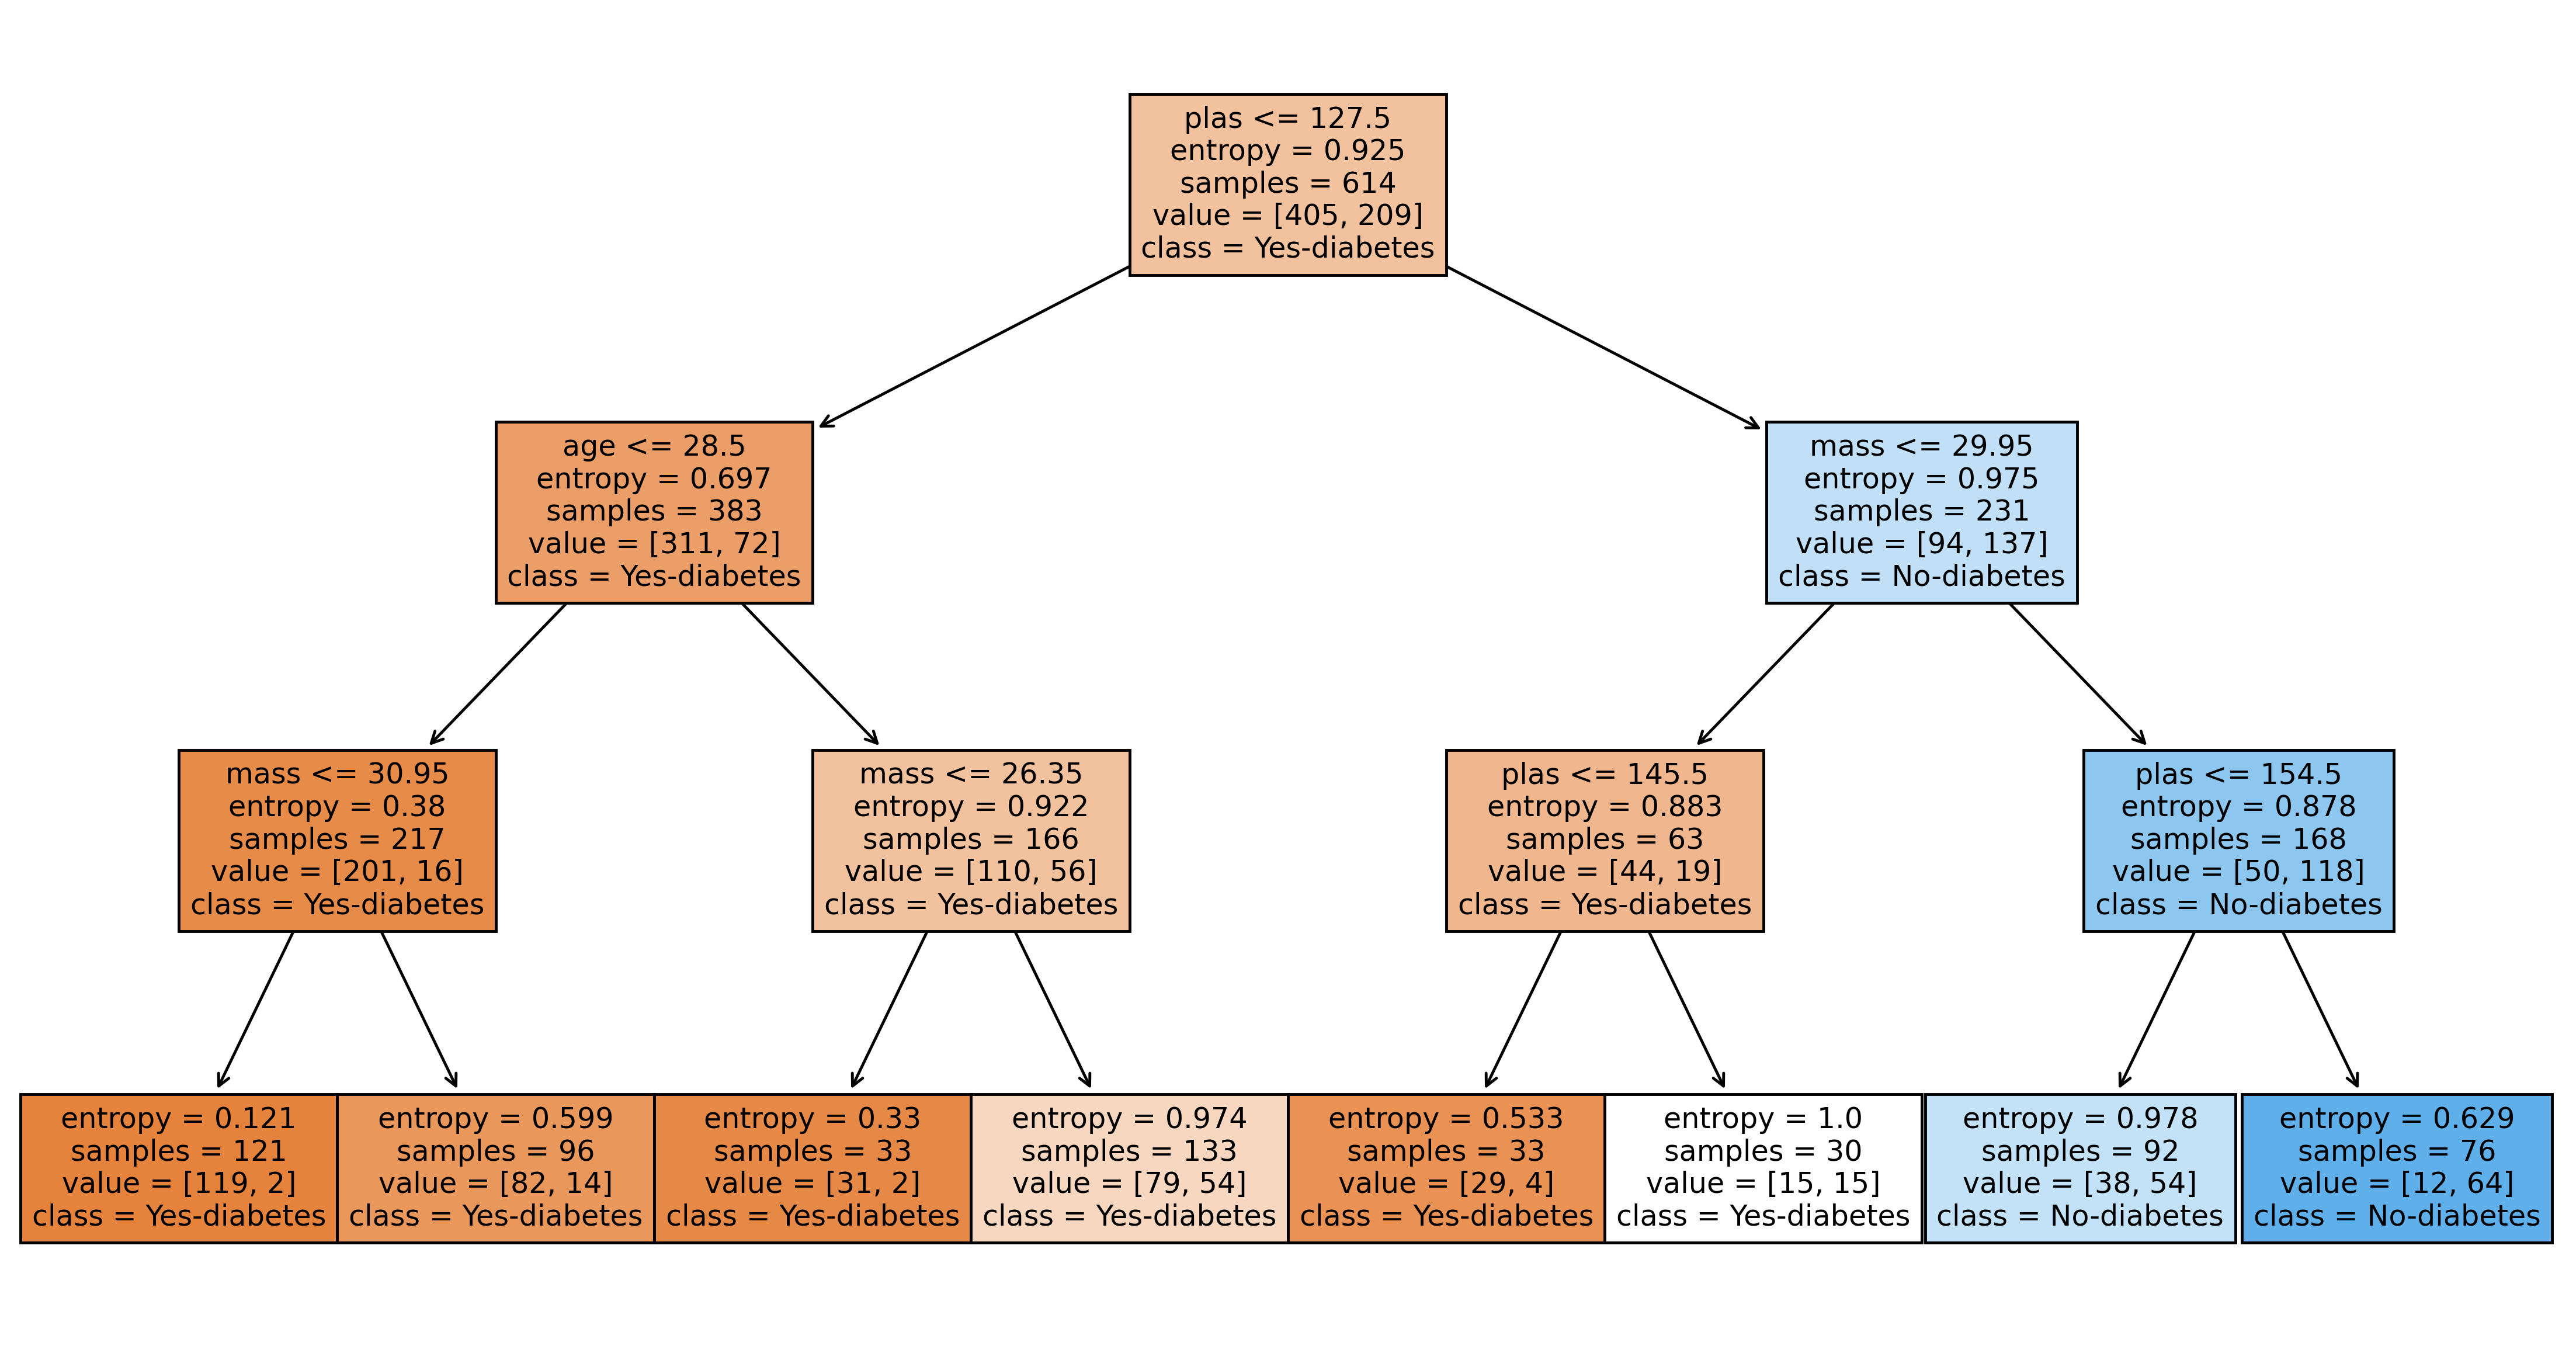

In [15]:
#A Fancy Decision Tree
fn = ['plas', 'mass', 'pedi', 'age']
cn=['Yes-diabetes', 'No-diabetes']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (16,8.5), dpi=350)
tree.plot_tree(model,
               feature_names = fn, 
               class_names=cn,
               filled = True);

In [16]:
#Predicting on test data
preds = model.predict(x_test) # predicting on test data set 
pd.DataFrame(preds).value_counts() # getting the count of each category 

0    115
1     39
dtype: int64

In [17]:
#The preds value for each datapoint in the Test Dataset 
preds

array([1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0],
      dtype=int64)

In [18]:
#Getting the 2 way table to understand the correct and wrong predictions -- Confusion Matrix
pd.crosstab(y_test,preds)

col_0,0,1
class,,
0,88,7
1,27,32


In [19]:
#Accuracy 
np.mean(preds==y_test)

0.7792207792207793

Inference: The Final Accuracy of the is 0.77

#### Building Decision Tree Classifier (CART) using Gini Criteria

In [20]:
from sklearn.tree import DecisionTreeClassifier
model_gini = DecisionTreeClassifier(criterion='gini', max_depth=3)

In [21]:
#Fitting the Model on Train Dataset
model_gini.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3)

Inference: Model is Fitted, The Decision Tree is of CART Technique, Pruning is Set using the Hyperparameter of max_depth = 3, while means only Three Split/Node will be there.

In [22]:
#Predicting on test data
preds = model.predict(x_test) # predicting on test data set 
pd.DataFrame(preds).value_counts() # getting the count of each category 

0    115
1     39
dtype: int64

In [23]:
#Accuracy 
np.mean(preds==y_test)

0.7792207792207793

Inference: The Final Accuracy of the is 0.77 which is Came Same as per C5.0 too 

#### Decision Tree Regression Example

#### Recursive Feature Elimination -- Feature Engineering For Regression

In [24]:
#Importing the Required libraries
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

import warnings
warnings.filterwarnings("ignore")  #--to ignore warnings

In [25]:
#Separating the Input / Output variable
array = diabetes.values
X = array[:,0:8]
Y = array[:,8]

In [26]:
# feature extraction -- Using LogisticRegression
model = LogisticRegression(max_iter=400)
rfe = RFE(model, 4)
fit = rfe.fit(X, Y)

In [27]:
#Feature Ranking:
print(fit.ranking_)
#Selected Features:
print(fit.support_)

[1 1 3 5 4 1 1 2]
[ True  True False False False  True  True False]


Inference: from the Recursive Feature Elimination , Using Logistic Regression method to get best feature, it gave boolean value above by which we can determined 0,1,5,6 index columns are best features 

In [28]:
# Decision Tree Regression
from sklearn.tree import DecisionTreeRegressor

In [29]:
# seprating x and y(class) variables 
X = diabetes.loc[:,['preg', 'plas', 'mass', 'pedi']]
Y = diabetes['class']

In [30]:
# Splitting data into training and testing data set
X_train,X_test,Y_train,Y_test = train_test_split(X,Y, test_size=0.2,random_state=1)

Inference: Made a Train-Test Split of 67% - 33%

In [31]:
#Building The Model & Fitting It on the Train Dataset
model = DecisionTreeRegressor()
model.fit(X_train, Y_train)

DecisionTreeRegressor()

In [32]:
#Predicting on test data
preds = model.predict(X_test) # predicting on test data set 
preds

array([0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 1., 1., 0., 1., 0., 0., 1.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 1., 1., 0., 0., 0., 1.,
       0., 1., 0., 1., 0., 1., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0.,
       0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0.,
       1., 1., 1., 1., 0., 0., 0., 1., 1., 0., 0., 1., 1., 1., 0., 0., 0.,
       1., 1., 1., 1., 0., 0., 0., 1., 0., 1., 1., 0., 0., 0., 0., 0., 0.,
       1., 1., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 1., 1., 1., 0., 0., 0., 0., 0., 0., 1., 0., 1., 1., 0., 0.,
       0., 1., 0., 1., 1., 1., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0.,
       0.])

Inference: Above Are the Predicted Value.

In [33]:
#Find the accuracy
model.score(X_test,Y_test)

-0.38585858585858634

In [34]:
#Getting the 2 way table to understand the correct and wrong predictions -- Confusion Matrix
pd.crosstab(Y_test,preds)

col_0,0.0,1.0
class,,
0,74,25
1,24,31
